1. AUDIO

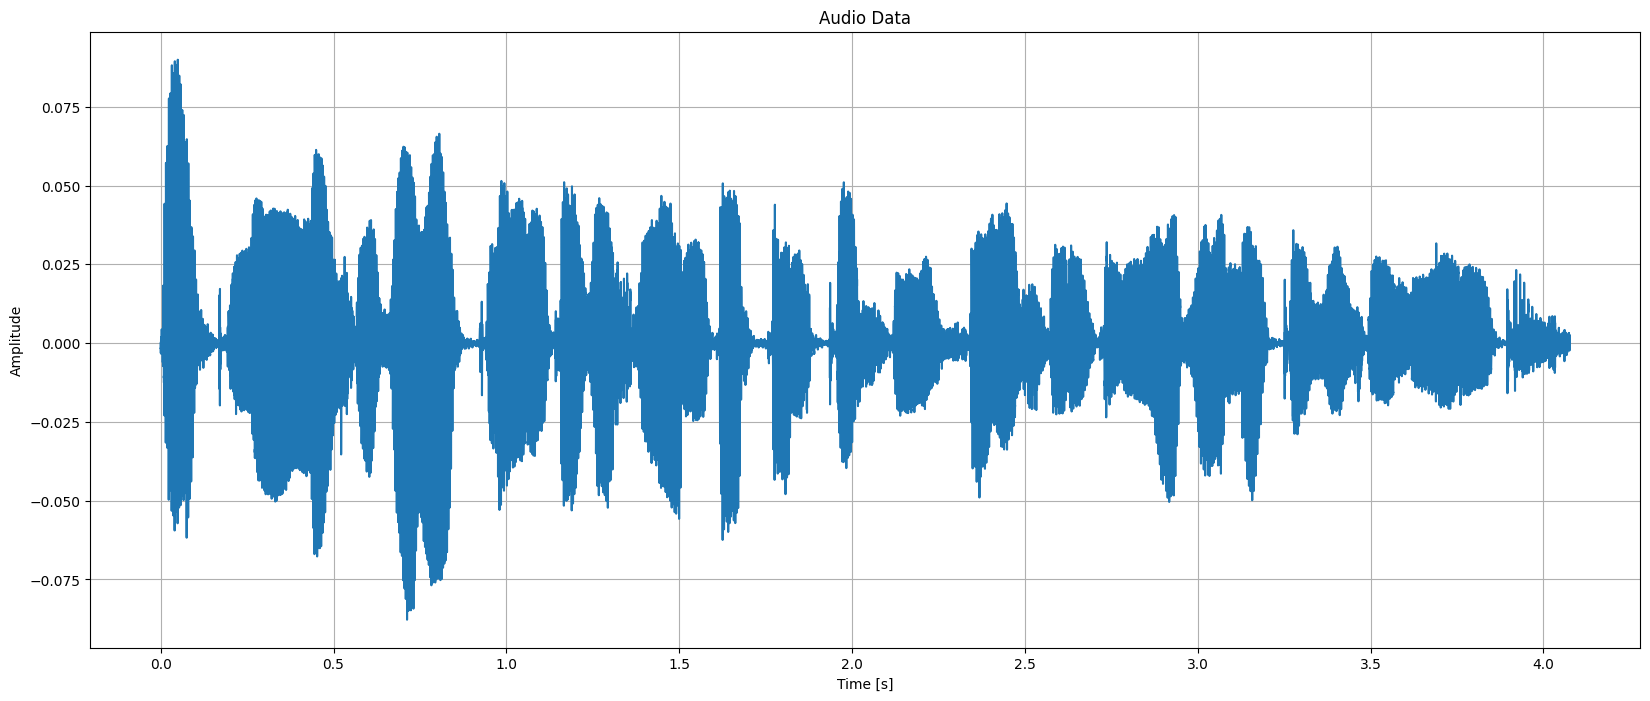

fs =  16000
num_channels =  1
bit_depth =  64
bin_rate =  1024000
bin_rate_kbps =  1024.0
audio_data.dtype =  float64


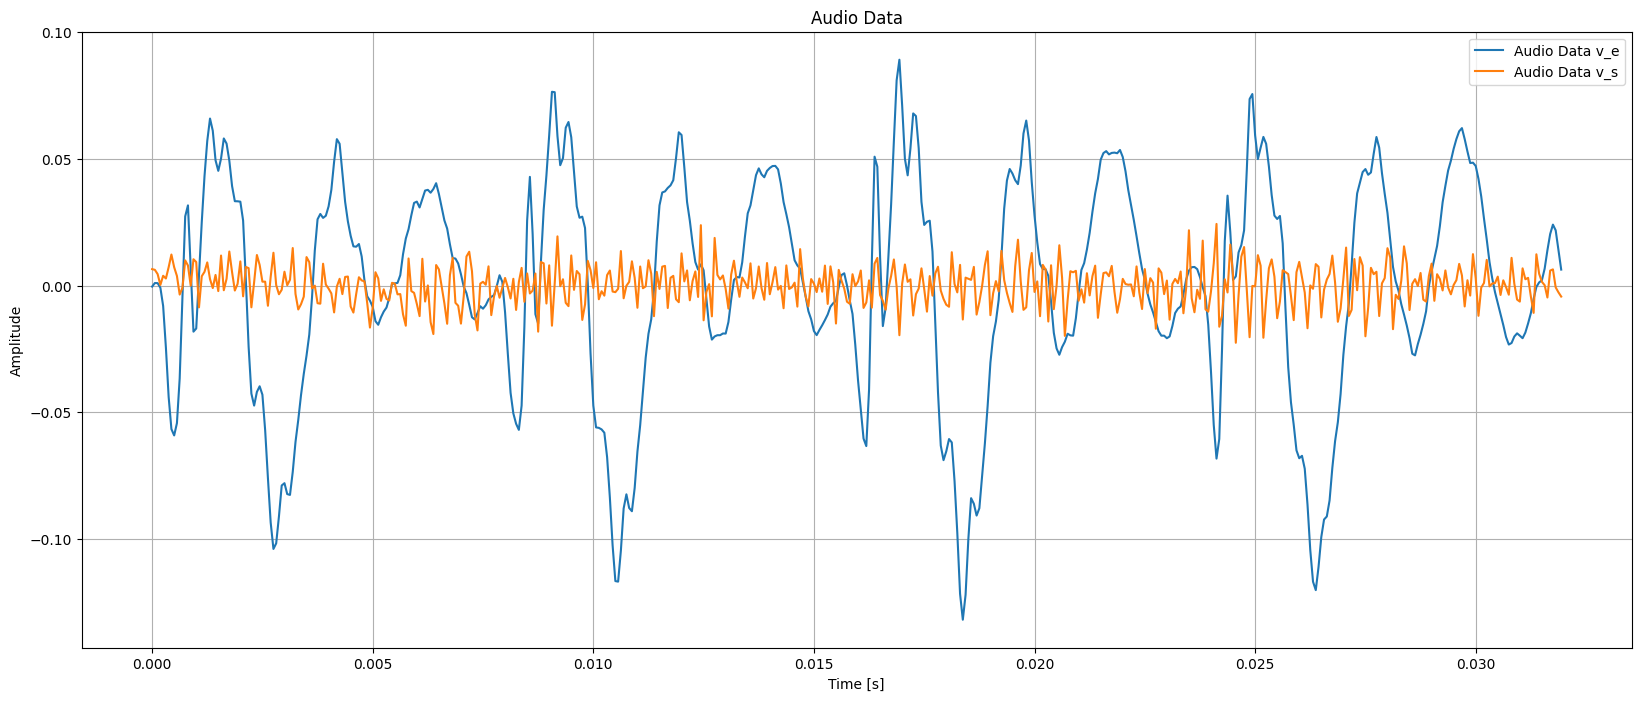

period_v_e =  6.25e-05
period_v_s =  6.25e-05
frequency_v_e =  16000.0
frequency_v_s =  16000.0


In [7]:
import scipy.io.wavfile as wav
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np


filename_v1 = "../data/v1.wav"

fs, audio_data = wav.read(filename_v1)

# play the audio file
# sd.play(audio_data, fs)
# sd.wait()


# graph the audio data
time = np.arange(0, len(audio_data) / fs, 1 / fs)

audio_data = (
    audio_data[:, 0] if len(audio_data.shape) > 1 else audio_data
)  # convert to mono if necessary

audio_data = audio_data / 2**15  # normalize the audio data

plt.figure(figsize=(20, 8))
plt.plot(time, audio_data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Audio Data")
plt.grid(True)
plt.show()


# obtain the sample rate of the audio file
print("fs = ", fs)

# number of channels in the audio file
num_channels = 1 if len(audio_data.shape) == 1 else audio_data.shape[1]
print("num_channels = ", num_channels)

# obtain the bit depth of the audio file
bit_depth = audio_data.dtype.itemsize * 8
print("bit_depth = ", bit_depth)

# calculate the bin rate
bin_rate = fs * num_channels * bit_depth  # bits per second
bin_rate_kbps = bin_rate / 1000  # kilobits per second
print("bin_rate = ", bin_rate)
print("bin_rate_kbps = ", bin_rate_kbps)

# Comprueba que la clase (o tipo de datos) de los elementos del vector x es double (coma flotante de 64 bits).
print("audio_data.dtype = ", audio_data.dtype)

############################################################################################################
filename_v_e = "../data/v_e.wav"
filename_v_s = "../data/v_s.wav"

[fs_v_e, audio_data_v_e] = wav.read(filename_v_e)
[fs_v_s, audio_data_v_s] = wav.read(filename_v_s)

# plot the audio data
time = np.arange(0, len(audio_data_v_e) / fs, 1 / fs)
time = np.arange(0, len(audio_data_v_s) / fs, 1 / fs)

audio_data_v_e = audio_data_v_e / 2**15  # normalize the audio data
audio_data_v_s = audio_data_v_s / 2**15  # normalize the audio data

plt.figure(figsize=(20, 8))
plt.plot(time, audio_data_v_e, label="Audio Data v_e")
plt.plot(time, audio_data_v_s, label="Audio Data v_s")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Audio Data")
plt.legend()
plt.grid(True)
plt.show()

# obtain period
period_v_e = 1 / fs_v_e
period_v_s = 1 / fs_v_s
print("period_v_e = ", period_v_e)
print("period_v_s = ", period_v_s)

# obtain frequency
frequency_v_e = 1 / period_v_e
frequency_v_s = 1 / period_v_s
print("frequency_v_e = ", frequency_v_e)
print("frequency_v_s = ", frequency_v_s)

fs =  44100
num_channels =  2
frequency =  22050.0
bin_rate_kbps =  1024.0
The audio is stereo


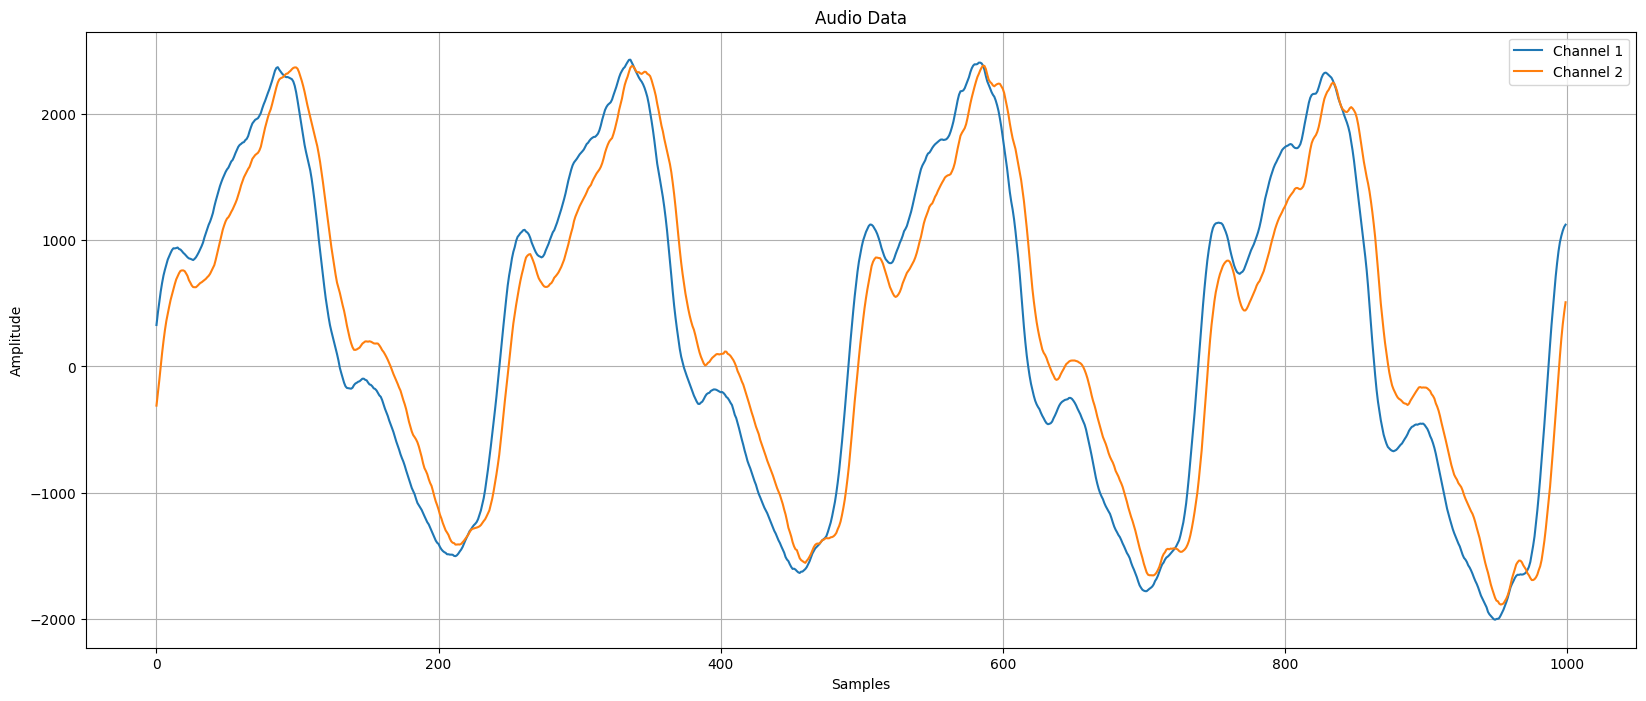

In [8]:
filename_vt1 = "../data/clarinete.wav"

[fs, audio_data] = wav.read(filename_vt1)

# frecuencia de muestreo de la señal de audio
print("fs = ", fs)

# play audio
# sd.play(audio_data, fs)
# sd.wait()

# number of channels in the audio file
num_channels = 1 if len(audio_data.shape) == 1 else audio_data.shape[1]
print("num_channels = ", num_channels)

# frequency of the audio signal in samples per second
frequency = fs / num_channels
print("frequency = ", frequency)

# calculate the bin rate
bin_rate_kbps = bin_rate / 1000  # kilobits per second
print("bin_rate_kbps = ", bin_rate_kbps)

# check if the audio is stereo or mono
if num_channels == 1:
    print("The audio is mono")
else:
    print("The audio is stereo")

# plot the first 1000 samples of two channels in the same plot
plt.figure(figsize=(20, 8))
plt.plot(audio_data[:1000, 0], label="Channel 1")
plt.plot(audio_data[:1000, 1], label="Channel 2")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Audio Data")
plt.legend()
plt.grid(True)
plt.show()

2. IMAGES


In [9]:
# read the image file
image1 = "../data/i1.png"

# number of rows and columns in x and the number of channels
rows, cols, channels = plt.imread(image1).shape
print("rows = ", rows)
print("cols = ", cols)
print("channels = ", channels)

# bits per pixel
bits_per_pixel = 8 * plt.imread(image1).dtype.itemsize
print("bits_per_pixel = ", bits_per_pixel)

############

import matplotlib.image as mpimg
from skimage import io

# Leer la imagen i1.png
img_i1 = mpimg.imread("data/i1.png")  # Regresa un array NumPy
print("===== Imagen i1.png =====")
print(f"Forma (rows, cols, channels): {img_i1.shape}")

num_filas, num_cols, num_componentes = img_i1.shape
print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_cols}")
print(f"Número de componentes (RGB): {num_componentes}")

# En general, si es PNG de 8 bits por canal, cada componente es uint8 en [0..255].
print(f"Dtype de la imagen: {img_i1.dtype}")

# Tasa binaria en bits/píxel = 8 bits * 3 canales = 24 bits/píxel (asumiendo 8 bits por canal)
bits_por_pixel = 8 * num_componentes
print(f"Bits/píxel (teórico): {bits_por_pixel}")

# Visualizamos la imagen
plt.figure()
plt.imshow(img_i1)
plt.title("Imagen RGB original (i1.png)")
plt.axis("off")
plt.show()

# Asumiendo que img_i1 es un array de forma (filas, cols, 3)
R = img_i1[:, :, 0]
G = img_i1[:, :, 1]
B = img_i1[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap="gray")
plt.title("Canal R")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(G, cmap="gray")
plt.title("Canal G")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(B, cmap="gray")
plt.title("Canal B")
plt.axis("off")

plt.tight_layout()
plt.show()

# Podemos usar la función de skimage para convertir la imagen a escala de grises
from skimage.color import rgb2gray

img_gray = rgb2gray(img_i1)

plt.figure()
plt.imshow(img_gray, cmap="gray")
plt.title("Imagen en escala de grises")
plt.axis("off")
plt.show()

print(f"Dtype de la imagen en escala de grises: {img_gray.dtype}")

rows =  708
cols =  512
channels =  3
bits_per_pixel =  32


FileNotFoundError: [Errno 2] No such file or directory: 'data/i1.png'

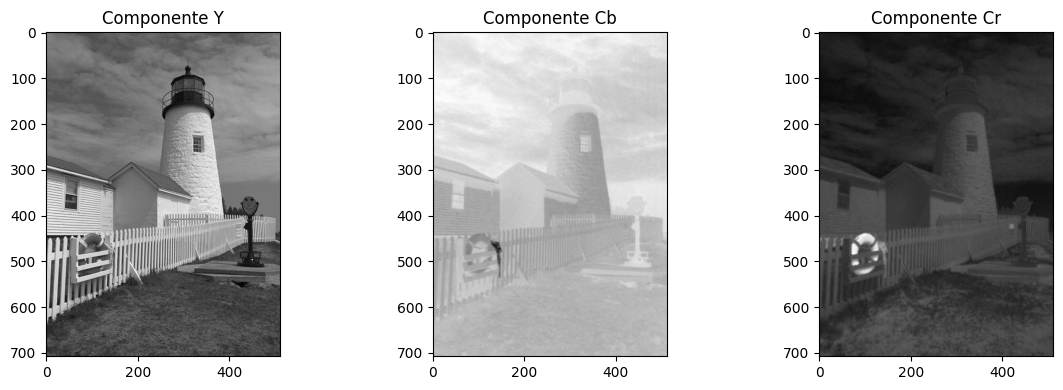

In [ ]:
from skimage.color import rgb2ycbcr

img_ycbcr = rgb2ycbcr(img_i1)  # Devuelve un array float
Y = img_ycbcr[:, :, 0]
Cb = img_ycbcr[:, :, 1]
Cr = img_ycbcr[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(Y, cmap="gray")
plt.title("Componente Y")

plt.subplot(1, 3, 2)
plt.imshow(Cb, cmap="gray")
plt.title("Componente Cb")

plt.subplot(1, 3, 3)
plt.imshow(Cr, cmap="gray")
plt.title("Componente Cr")

plt.tight_layout()
plt.show()

CLASES NUMÉRICAS

In [5]:
# # Ejemplo de vector int8
# a = np.zeros((1, 2), dtype=np.int8)
# a[0, 0] = -140  # Se desborda en int8: -128 es el mínimo.
# a[0, 1] = 120
# print("Array int8:", a, a.dtype)

# # Otro ejemplo
# b = np.array([150], dtype=np.uint8)
# print("Array uint8:", b, b.dtype)


a = np.array([150], dtype=np.int16)
b = np.array([2], dtype=np.uint8)
# c = a*b  # Esto en Python se puede hacer, pero generará un array con promoción de tipo.
c = (a.astype(np.int32) * b.astype(np.int32)).astype(np.uint8)
print(c, c.dtype)

#####
x = np.array([0, 3, 6], dtype=np.uint8)
y = np.array([3, 6, 9], dtype=np.uint8)

# Restar directamente
e = x - y
print("x - y con dtype=uint8:", e)
# Espera un resultado saturado (o en este caso con overflow modular)

# Para hacer la resta real en 'double', convertimos primero a float:
e_float = x.astype(np.float32) - y.astype(np.float32)
print("x - y como float:", e_float)

# Cálculo de un MSE (Mean Squared Error) real
mse = np.mean((e_float**2))
print("MSE (float):", mse)

[44] uint8
x - y con dtype=uint8: [253 253 253]
x - y como float: [-3. -3. -3.]
MSE (float): 9.0
